### FNN(feedforword neural network)

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load Data
iris = load_iris()
X, y = iris.data, iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build FNN
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),  # Hidden Layer 1
    Dense(6, activation='relu'),                    # Hidden Layer 2
    Dense(3, activation='softmax')                  # Output Layer
])

# Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Plea

Epoch 1/50


c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2417 - loss: 1.2759
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 1.1904
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2833 - loss: 1.1215
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3250 - loss: 1.0668 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4000 - loss: 1.0152 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5750 - loss: 0.9657 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6750 - loss: 0.9153
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.8663 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6750 - loss: 0.8137
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.7656 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6750 - loss: 0.7195 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0

### Regularization 
1.) Dropout method 

In [2]:
import tensorflow as tf

model_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.5),  # 50% neurons turned off randomly
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


2.) L1 and L2 regularization

In [3]:
from keras import regularizers

# L2 Regularization
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.L2(0.01),
                          input_shape=(10,)),
    tf.keras.layers.Dense(1)
])

# L1 Regularization
model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.L1(0.01),
                          input_shape=(10,)),
    tf.keras.layers.Dense(1)
])

# L1 + L2 (Elastic Net)
model_l1l2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01),
                          input_shape=(10,)),
    tf.keras.layers.Dense(1)
])


### Batchnormalization


In [5]:
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Standardize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

model_bn.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model_bn.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100, batch_size=16, verbose=1)

loss, mae = model_bn.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Data: {mae:.2f}")


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
Epoch 1/100


c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 551.8375 - mae: 22.2945 - val_loss: 595.0100 - val_mae: 22.8946
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 521.1238 - mae: 22.0574 - val_loss: 575.4066 - val_mae: 22.6309
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 502.8332 - mae: 21.7828 - val_loss: 556.0751 - val_mae: 22.3671
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 483.2123 - mae: 21.4579 - val_loss: 540.6212 - val_mae: 22.1625
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 466.2473 - mae: 21.0749 - val_loss: 523.0927 - val_mae: 21.8851
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 441.3280 - mae: 20.6327 - val_loss: 500.8864 - val_mae: 21.4945
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 422.8416 - mae: 20.1196 - val_loss: 467.3295 - val_mae: 20.6847
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 396.8688 - mae: 19.5359 - val_loss: 437.8219 - val_mae: 20.0388
Epoch 9/100
26/26 ━━━━━━━━━

# CNN( Convolutional Neural Networks)

In [6]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import fashion_mnist

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape (grayscale → 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8536 - loss: 0.4025 - val_accuracy: 0.8944 - val_loss: 0.2986
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9046 - loss: 0.2610 - val_accuracy: 0.9060 - val_loss: 0.2619
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9202 - loss: 0.2154 - val_accuracy: 0.9111 - val_loss: 0.2467
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9322 - loss: 0.1835 - val_accuracy: 0.9186 - val_loss: 0.2272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9424 - loss: 0.1568 - val_accuracy: 0.9204 - val_loss: 0.2321
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9204 - loss: 0.2321
Test Accuracy: 0.92


### transfer learning 
1.) feature extraction 

2.) fine tuning 

In [8]:
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
import numpy as np

# Load pretrained MobileNetV2 (exclude top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze all layers for feature extraction

# Add custom classifier
model_transfer = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model for feature extraction phase
model_transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dummy example data
X_dummy = np.random.rand(20, 128, 128, 3).astype(np.float32)
y_dummy = np.random.randint(0, 2, 20).astype(np.float32)  # Float labels for sigmoid

# Train (Feature Extraction)
print("🔹 Feature Extraction Phase")
model_transfer.fit(X_dummy, y_dummy, epochs=2, batch_size=4, verbose=1)

# Fine-tuning: unfreeze last few layers
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all but last 20 layers
    layer.trainable = False

# Recompile for fine-tuning phase (lower learning rate)
model_transfer.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
                       loss='binary_crossentropy', metrics=['accuracy'])

print("\n🔹 Fine-Tuning Phase")
model_transfer.fit(X_dummy, y_dummy, epochs=2, batch_size=4, verbose=1)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
🔹 Feature Extraction Phase
Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.3500 - loss: 1.1372
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4500 - loss: 1.2083

🔹 Fine-Tuning Phase
Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.4500 - loss: 0.7272
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5500 - loss: 0.6896


# RNN(recurrent neural network )

Epoch 1/20


c:\Users\svish\Desktop\jupyter-notebook\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2731 - val_loss: 0.0275
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0310 - val_loss: 0.0201
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - val_loss: 0.0202
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - val_loss: 0.0175
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - val_loss: 0.0158
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0126 - val_loss: 0.0161
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0132 - val_loss: 0.0158
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0130 - val_loss: 0.0157
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - val_loss: 0.0153
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - val_loss: 0.0156
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0116 - val_loss: 0.0148
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - val_l

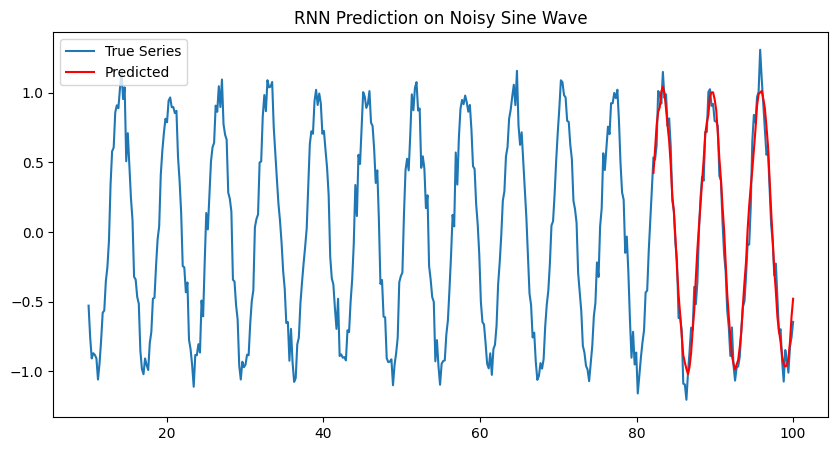

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models

# 1️ Generate Noisy Sine Wave Data
np.random.seed(42)
time_steps = np.linspace(0, 100, 500)  # 500 time points
series = np.sin(time_steps) + 0.1 * np.random.randn(500)  # sine wave + noise

#  Prepare Data for RNN
window_size = 50  # Use past 50 points to predict next point
X, y = [], []
for i in range(len(series) - window_size):
    X.append(series[i:i+window_size])
    y.append(series[i+window_size])

X = np.array(X)
y = np.array(y)

# Reshape for RNN (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  Build RNN Model
model_rnn = models.Sequential([
    layers.SimpleRNN(32, activation='tanh', input_shape=(window_size, 1)),
    layers.Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')

#  Train Model
history = model_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

#  Predict
predictions = model_rnn.predict(X_test)

#  Plot Results
plt.figure(figsize=(10,5))
plt.plot(time_steps[window_size:], series[window_size:], label="True Series")
plt.plot(time_steps[split+window_size:], predictions, label="Predicted", color='red')
plt.legend()
plt.title("RNN Prediction on Noisy Sine Wave")
plt.show()


## LSTM(long short term memory )

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.4250 - val_loss: 0.3021
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1462 - val_loss: 0.0181
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0274 - val_loss: 0.0180
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0146 - val_loss: 0.0153
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - val_loss: 0.0145
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0106 - val_loss: 0.0134
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - val_loss: 0.0135
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - val_loss: 0.0142
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0108 - val_loss: 0.0135
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0105 - val_loss: 0.0136
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - val_loss: 0.0132
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0

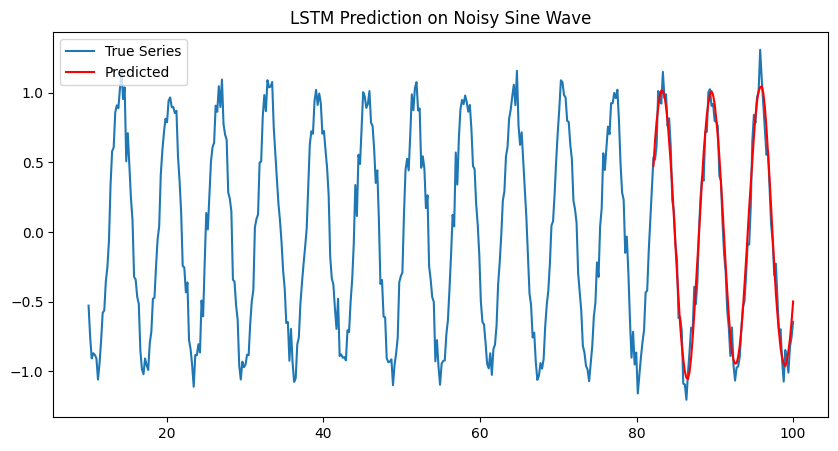

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models

#  Generate Noisy Sine Wave Data
np.random.seed(42)
time_steps = np.linspace(0, 100, 500)
series = np.sin(time_steps) + 0.1 * np.random.randn(500)

#  Prepare Data
window_size = 50
X, y = [], []
for i in range(len(series) - window_size):
    X.append(series[i:i+window_size])
    y.append(series[i+window_size])

X = np.array(X).reshape(-1, window_size, 1)
y = np.array(y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  Build LSTM Model
model_lstm = models.Sequential([
    layers.LSTM(64, activation='tanh', input_shape=(window_size, 1)),
    layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

#  Train Model
history = model_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

#  Predict
predictions = model_lstm.predict(X_test)

#  Plot Results
plt.figure(figsize=(10,5))
plt.plot(time_steps[window_size:], series[window_size:], label="True Series")
plt.plot(time_steps[split+window_size:], predictions, label="Predicted", color='red')
plt.legend()
plt.title("LSTM Prediction on Noisy Sine Wave")
plt.show()


# GRU(gated recurrent unit )

In [11]:
import numpy as np
import tensorflow as tf
from keras import layers, models

#  Create Simple Sequence Data
# Example sequence: [1, 2, 3, 4, 5, ...]
sequence = np.array([i for i in range(1, 101)], dtype=float)

# Normalize (better for GRU)
sequence = sequence / 100.0

# Prepare Data for GRU
window_size = 5  # Use last 5 numbers to predict next
X, y = [], []
for i in range(len(sequence) - window_size):
    X.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])

X = np.array(X).reshape(-1, window_size, 1)
y = np.array(y)

#  Build GRU Model
model_gru = models.Sequential([
    layers.GRU(32, activation='tanh', input_shape=(window_size, 1)),
    layers.Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')

#  Train Model
model_gru.fit(X, y, epochs=100, verbose=0)

#  Predict Next Number
test_input = np.array([96, 97, 98, 99, 100]) / 100.0
test_input = test_input.reshape(1, window_size, 1)

predicted = model_gru.predict(test_input)
predicted_number = predicted[0][0] * 100

print(f"Predicted next number after 100: {predicted_number:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted next number after 100: 101.38


# seq2seq 


In [15]:
import numpy as np
import tensorflow as tf
from keras import layers, models

# 1. Create Toy Dataset
data_size = 2000
seq_length = 5

# Random integer sequences between 1 and 9
X_encoder = np.random.randint(1, 10, size=(data_size, seq_length, 1))
y_decoder = np.flip(X_encoder, axis=1)  # Reversed sequence

# Decoder input (teacher forcing): shifted output
X_decoder = np.zeros_like(y_decoder)
X_decoder[:, 1:, :] = y_decoder[:, :-1, :]

# Normalize data
X_encoder = X_encoder / 10.0
X_decoder = X_decoder / 10.0
y_decoder = y_decoder / 10.0

# 2. Encoder
encoder_inputs = layers.Input(shape=(seq_length, 1))
encoder_lstm = layers.LSTM(64, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# 3. Decoder
decoder_inputs = layers.Input(shape=(seq_length, 1))
decoder_lstm = layers.LSTM(64, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = layers.Dense(1)
decoder_outputs = decoder_dense(decoder_outputs)

# 4. Model
model_seq2seq = models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model_seq2seq.compile(optimizer='adam', loss='mse')

# 5. Train Model (more epochs for better accuracy)
model_seq2seq.fit([X_encoder, X_decoder], y_decoder, epochs=50, batch_size=32, verbose=0)

# 6. Test Prediction
test_input = np.array([[[1],[2],[3],[4],[5]]]) / 10.0
test_decoder_input = np.zeros_like(test_input)

prediction = model_seq2seq.predict([test_input, test_decoder_input])
predicted_numbers = np.round(prediction[0]*10).astype(int)

print("Input sequence:    ", (test_input[0]*10).astype(int).flatten())
print("Predicted reverse: ", predicted_numbers.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Input sequence:     [1 2 3 4 5]
Predicted reverse:  [ 5 14 27 35 29]
